### Aircraft Safety Analysis - P1


In [336]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame

In [337]:
#loading the dataset
df = pd.read_csv("data/AviationData.csv", encoding = "Latin1", low_memory=False) #using Latin1 to laod the dataset
df #viewing the dataset 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Data Card

- **Event.Id**: Unique identifier assigned to each aviation accident event in the database.

- **Investigation.Type**: Type of investigation conducted for the accident, categorized as "Incident," "Accident," etc.

- **Accident.Number**: Unique identifier assigned to each aviation accident.

- **Event.Date**: Date when the accident occurred.

- **Location**: Geographical location where the accident took place, including city, state, and country.

- **Country**: Country where the accident occurred.

- **Latitude**: Geographical latitude coordinate of the accident location.

- **Longitude**: Geographical longitude coordinate of the accident location.

- **Airport.Code**: Code assigned to the airport nearest to the accident site.

- **Airport.Name**: Name of the airport nearest to the accident site.

- **Injury.Severity**: Severity of injuries sustained by individuals involved in the accident, ranging from minor to fatal.

- **Aircraft.damage**: Extent of damage sustained by the aircraft involved in the accident, categorized as minor, substantial, destroyed, etc.

- **Aircraft.Category**: Category of aircraft involved in the accident, such as airplane, helicopter, glider, etc.

- **Registration.Number**: Unique registration number assigned to the aircraft.

- **Make**: Make or manufacturer of the aircraft.

- **Model**: Model of the aircraft.

- **Amateur.Built**: Indicates whether the aircraft involved was built by amateur constructors.

- **Number.of.Engines**: Number of engines installed on the aircraft.

- **Engine.Type**: Type of engine(s) installed on the aircraft, such as reciprocating, turbojet, turboprop, etc.

- **FAR.Description**: Description of the Federal Aviation Regulation (FAR) under which the aircraft operates.

- **Schedule**: Indicates whether the flight was scheduled or unscheduled.

- **Purpose.of.flight**t: Purpose of the flight at the time of the accident, such as personal, commercial, instructional, etc.

- **Air.carrier**: Air carrier associated with the flight, if applicable.

- **Total.Fatal.Injuries**: Total number of fatal injuries resulting from the accident.

- **Total.Serious.Injuries**: Total number of serious injuries resulting from the accident.

- **Total.Minor.Injuries**: Total number of minor injuries resulting from the accident.

- **Total.Uninjured**: Total number of individuals who were uninjured in the accident.

- **Weather.Condition**: Prevailing weather conditions at the time of the accident.

- **Broad.phase.of.flight**: Phase of flight during which the accident occurred, such as takeoff, climb, cruise, descent, etc.

- **Report.Status**: Status of the accident investigation report.

- **Publication.Date**: Date when the accident investigation report was published.

In [338]:
#checking the dimensions(rows and columns) of the dataframe
df.shape

(88889, 31)

In [339]:
#checking the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [340]:
#checking concise descriptive statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [341]:
#checking statistical summary for categorical variables
df.describe(include="O").T

,count,unique,top,freq
Event.Id,88889,87951,20001212X19172,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,CEN22LA149,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25589,332739N,19
Longitude,34373,27154,0112457W,24
Airport.Code,50132,10374,NONE,1488
Airport.Name,52704,24870,Private,240


In [342]:
#replacing the dots in columns to underscores
df.columns = df.columns.str.replace(".", "_")
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [343]:
#checking column datatypes
df.dtypes

Event_Id                   object
Investigation_Type         object
Accident_Number            object
Event_Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_Code               object
Airport_Name               object
Injury_Severity            object
Aircraft_damage            object
Aircraft_Category          object
Registration_Number        object
Make                       object
Model                      object
Amateur_Built              object
Number_of_Engines         float64
Engine_Type                object
FAR_Description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Weather_Condition          object
Broad_phase_of_flight      object
Report_Status 

In [344]:
#changing the event_date column to a datetime dtype
df["Event_Date"] = pd.to_datetime(df["Event_Date"], errors='coerce') #errors='coerce' will replace invalid parsing with NaT

In [345]:
#get the min and max dates
date_min = df['Event_Date'].min()
date_max = df['Event_Date'].max()

(date_min, date_max)

(Timestamp('1948-10-24 00:00:00'), Timestamp('2022-12-29 00:00:00'))

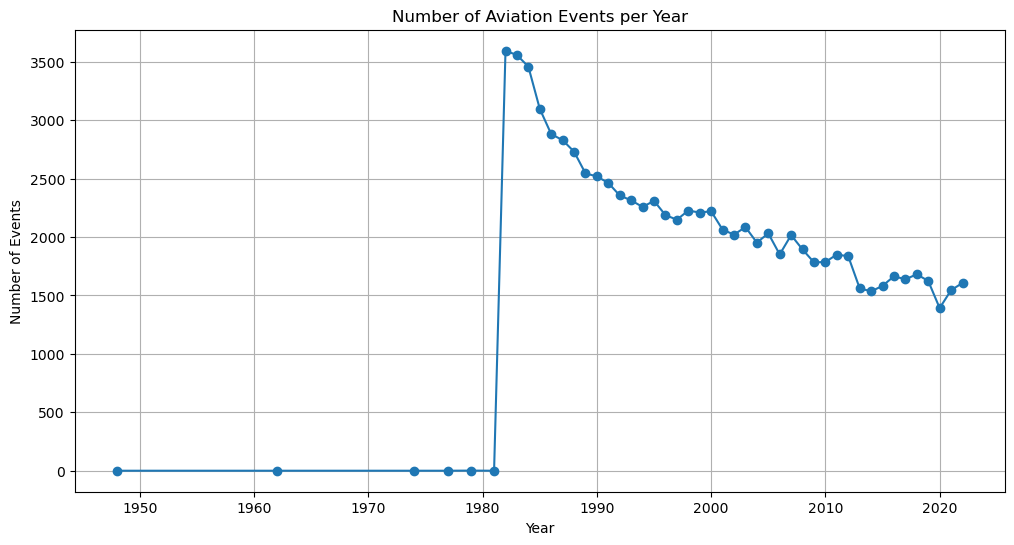

In [346]:
#extract year from Event_Date
df['Year'] = df['Event_Date'].dt.year

#count events per year
events_per_year = df['Year'].value_counts().sort_index()

#plotting the number of events per year
plt.figure(figsize=(12,6))
plt.plot(events_per_year.index, events_per_year.values, marker='o')
plt.title("Number of Aviation Events per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()

In [347]:
#creating a dataframe copy to be used in data cleaning
df2 = df.copy(deep=True)
df2.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


In [348]:
#checking for unique values in each column

for column in df2:
    unique_values = df2[column].unique()
    print(f"Unique values in column: '{column}' \n {unique_values}", '\n')

Unique values in column: 'Event_Id' 
 ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column: 'Investigation_Type' 
 ['Accident' 'Incident'] 

Unique values in column: 'Accident_Number' 
 ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

Unique values in column: 'Event_Date' 
 <DatetimeArray>
['1948-10-24 00:00:00', '1962-07-19 00:00:00', '1974-08-30 00:00:00',
 '1977-06-19 00:00:00', '1979-08-02 00:00:00', '1979-09-17 00:00:00',
 '1981-08-01 00:00:00', '1982-01-01 00:00:00', '1982-01-02 00:00:00',
 '1982-01-03 00:00:00',
 ...
 '2022-12-13 00:00:00', '2022-12-14 00:00:00', '2022-12-15 00:00:00',
 '2022-12-16 00:00:00', '2022-12-17 00:00:00', '2022-12-18 00:00:00',
 '2022-12-21 00:00:00', '2022-12-22 00:00:00', '2022-12-26 00:00:00',
 '2022-12-29 00:00:00']
Length: 14782, dtype: datetime64[ns] 

Unique values in column: 'Location' 
 ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Sa

In [349]:
#checking number of unique values in each column

for column in df2:
    nunique_values = df2[column].nunique()
    print(f"Unique values in column '{column}','\n': {nunique_values}", '\n')

Unique values in column 'Event_Id','
': 87951 

Unique values in column 'Investigation_Type','
': 2 

Unique values in column 'Accident_Number','
': 88863 

Unique values in column 'Event_Date','
': 14782 

Unique values in column 'Location','
': 27758 

Unique values in column 'Country','
': 219 

Unique values in column 'Latitude','
': 25589 

Unique values in column 'Longitude','
': 27154 

Unique values in column 'Airport_Code','
': 10374 

Unique values in column 'Airport_Name','
': 24870 

Unique values in column 'Injury_Severity','
': 109 

Unique values in column 'Aircraft_damage','
': 4 

Unique values in column 'Aircraft_Category','
': 15 

Unique values in column 'Registration_Number','
': 79104 

Unique values in column 'Make','
': 8237 

Unique values in column 'Model','
': 12318 

Unique values in column 'Amateur_Built','
': 2 

Unique values in column 'Number_of_Engines','
': 7 

Unique values in column 'Engine_Type','
': 12 

Unique values in column 'FAR_Description','


## Data Cleaning

In [350]:
#checking column names
df2.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date', 'Year'],
      dtype='object')

In [351]:
#changing column names to capitalize the beginning of words
df2.columns = df2.columns.str.title()
df2.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date', 'Year'],
      dtype='object')

In [352]:
#removing whitespaces in the entire dataframe if any
df2 = df2.map(lambda x: x.strip() if isinstance(x, str) else x)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                88889 non-null  object        
 1   Investigation_Type      88889 non-null  object        
 2   Accident_Number         88889 non-null  object        
 3   Event_Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport_Code            50132 non-null  object        
 9   Airport_Name            52704 non-null  object        
 10  Injury_Severity         87889 non-null  object        
 11  Aircraft_Damage         85695 non-null  object        
 12  Aircraft_Category       32287 non-null  object

In [353]:
#dropping unncessary columns
df2.drop(["Event_Id", "Investigation_Type", "Accident_Number", "Event_Date", "Latitude", "Longitude", "Airport_Code", "Airport_Name",
          "Registration_Number", "Far_Description", "Schedule", "Air_Carrier", "Total_Uninjured", "Report_Status", 
          "Publication_Date"], axis=1, inplace=True) #inplace=True to make changes in the original dataframe
df2.head()

,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Amateur_Built,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Weather_Condition,Broad_Phase_Of_Flight,Year
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,UNK,Cruise,1948
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,UNK,Unknown,1962
2,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,IMC,Cruise,1974
3,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,1977
4,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,VMC,Approach,1979


In [354]:
#changing column values to uppercase
df2["Location"] = df2["Location"].str.upper()
df2["Make"] = df2["Make"].str.upper()
df2["Model"] = df2["Model"].str.upper()
df2["Weather_Condition"] = df2["Weather_Condition"].str.upper()

In [355]:
df2.head()

,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Amateur_Built,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Weather_Condition,Broad_Phase_Of_Flight,Year
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,STINSON,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,UNK,Cruise,1948
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,PIPER,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,UNK,Unknown,1962
2,"SALTVILLE, VA",United States,Fatal(3),Destroyed,NaN,CESSNA,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,IMC,Cruise,1974
3,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,ROCKWELL,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,IMC,Cruise,1977
4,"CANTON, OH",United States,Fatal(1),Destroyed,NaN,CESSNA,501,No,NaN,NaN,Personal,1.0,2.0,NaN,VMC,Approach,1979


In [356]:
#checking frequency of unique values after converting to uppercase
location_count = df2["Location"].value_counts()
make_count = df2["Make"].value_counts()
model_count = df2["Model"].value_counts()
weather_condition_count = df2["Weather_Condition"].value_counts()

print(f"Total location rows: {location_count} \n")
print(f"Total make rows: {make_count} \n")
print(f"Total model rows: {model_count} \n")
print(f"Total weather condition rows: {weather_condition_count} \n")

Total location rows: Location
ANCHORAGE, AK       548
MIAMI, FL           275
HOUSTON, TX         271
ALBUQUERQUE, NM     265
CHICAGO, IL         256
                   ... 
MEDINA, MN            1
CIRCLE PINES, MN      1
PINE ISLAND, FL       1
CHURCHTOWN, OH        1
BRASNORTE,            1
Name: count, Length: 21977, dtype: int64 

Total make rows: Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
COHEN                1
KITCHENS             1
LUTES                1
IZATT                1
ROYSE RALPH L        1
Name: count, Length: 7587, dtype: int64 

Total model rows: Model
152                 2367
172                 1756
172N                1164
PA-28-140            932
150                  829
                    ... 
E75NL                  1
747-273C               1
WATCHA-MCCALL-IT       1
MD-520N                1
M-8 EAGLE              1
Name: count, Length: 11646, dtype: int64 

Tota

In [357]:
#counting total number of duplicate rows
duplicate_count = df2.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 139


In [358]:
#selecting duplicate rows
df2.loc[df2.duplicated()]


,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Amateur_Built,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Weather_Condition,Broad_Phase_Of_Flight,Year
325,"CHESTERFIELD, MO",United States,Non-Fatal,Substantial,Airplane,CESSNA,152,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,VMC,Takeoff,1982
1211,"CAMERON, LA",United States,Non-Fatal,Substantial,Helicopter,BELL,206L-1,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,VMC,Cruise,1982
1371,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,CESSNA,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,VMC,Cruise,1982
2491,"GRAND CANYON, AZ",United States,Non-Fatal,Substantial,Helicopter,BELL,206B,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,VMC,Cruise,1982
3082,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,BELL,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,VMC,Cruise,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87130,"DARWIN, AUSTRALIA",Australia,NaN,NaN,Airplane,BOEING,737,No,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,2021
87645,"WATERVILLE, ME",United States,Non-Fatal,Substantial,Airplane,CESSNA,172RG,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,VMC,NaN,2022
88387,"BEALETON, VA",United States,Minor,Substantial,Airplane,BOEING,A75N1,No,1.0,NaN,Business,0.0,2.0,0.0,VMC,NaN,2022
88528,"MUMBAI,",India,NaN,NaN,Airplane,BOEING,787,No,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,2022


In [359]:
#removing duplicate rows and making it permanent
df2.drop_duplicates(inplace=True)

In [360]:
df2.shape

(88750, 17)

In [361]:
#reseting the dataframe index
df2.reset_index(inplace=True, drop=True)

In [362]:
#filtering the dataframe by year range
filtered_df2 = df2[(df2["Year"] >= 1990) & (df2["Year"] <= 2022)]
filtered_df2.shape

(64092, 17)

I have decided to filter the dataframe to at least 3 decades, from 1990-2022
This is because:
1. The period `'1990s - early 2000s'` saw the rise of low-cost carriers and the formation of airline alliances, creating new market structures and driving innovation in services and operations.

2. Moreover, the period `'2000s - present'` was defined by the "digital transformation" of the airline industry, focusing on data-driven decisions, streamlined operations, and improved passenger experiences through advanced software and technologies like AI and cloud computing.

Year
1990    2514
1991    2458
1992    2351
1993    2311
1994    2255
1995    2306
1996    2184
1997    2147
1998    2221
1999    2208
2000    2219
2001    2061
2002    2018
2003    2084
2004    1950
2005    2026
2006    1850
2007    2013
2008    1886
2009    1777
2010    1782
2011    1846
2012    1830
2013    1560
2014    1534
2015    1579
2016    1658
2017    1637
2018    1673
2019    1616
2020    1391
2021    1544
2022    1603
Name: count, dtype: int64


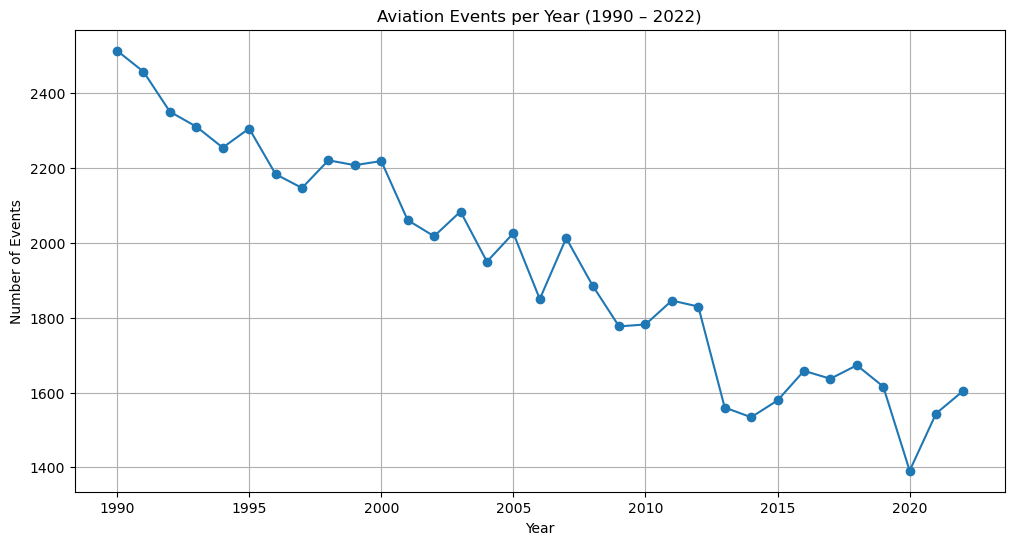

In [363]:
#count number of events per year
events_per_year = filtered_df2['Year'].value_counts().sort_index()

#display as table
print(events_per_year)

#plot the distribution of events per year

plt.figure(figsize=(12,6))
plt.plot(events_per_year.index, events_per_year.values, marker='o')
plt.title("Aviation Events per Year (1990 – 2022)")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


### Handling Missing Values

In [364]:
#checking for missing values
filtered_df2.isnull().sum().sort_values(ascending=True)

Year                          0
Location                     45
Make                         57
Model                        75
Amateur_Built               101
Country                     112
Injury_Severity             994
Aircraft_Damage            2637
Weather_Condition          4480
Number_Of_Engines          5790
Purpose_Of_Flight          6143
Engine_Type                7083
Total_Fatal_Injuries      11277
Total_Minor_Injuries      11773
Total_Serious_Injuries    12355
Broad_Phase_Of_Flight     26974
Aircraft_Category         35499
dtype: int64

- I will fill the missing values with zero (0) for the total_fatal_injuries, total_minor_injuries, and total_serious_injuries columns.

- This is because the number of missing values are too many to delete the rows entirely and the mean cannot be used because someone can only either be injured or uninjured.

- Zero (0) is also the mode of the columns, thus making it the most appropriate value to use.

In [374]:
#find the mode of the columns
mode_fatal_injuries = filtered_df2["Total_Fatal_Injuries"].mode()
mode_minor_injuries = filtered_df2["Total_Minor_Injuries"].mode()
mode_serious_injuries = filtered_df2["Total_Serious_Injuries"].mode()

#checking the mode values
print(f"Mode of Total_Fatal_Injuries: {mode_fatal_injuries[0]}")
print(f"Mode of Total_Minor_Injuries: {mode_minor_injuries[0]}")
print(f"Mode of Total_Serious_Injuries: {mode_serious_injuries[0]}")

Mode of Total_Fatal_Injuries: 0.0
Mode of Total_Minor_Injuries: 0.0
Mode of Total_Serious_Injuries: 0.0


In [ ]:
#find the mode of the columns
mode_fatal_injuries = filtered_df2["Total_Fatal_Injuries"].mode()
mode_minor_injuries = filtered_df2["Total_Minor_Injuries"].mode()
mode_serious_injuries = filtered_df2["Total_Serious_Injuries"].mode()

#fill the missing values for each column with the mode zero (0)
filtered_df2["Total_Fatal_Injuries"].fillna(mode_fatal_injuries[0], inplace=True)
filtered_df2["Total_Serious_Injuries"].fillna(mode_serious_injuries[0], inplace=True)
filtered_df2["Total_Minor_Injuries"].fillna(mode_minor_injuries[0], inplace=True)

#check effected changes
df2.isnull().sum()  

Event_Date                    0
Location                     52
Country                     226
Injury_Severity             998
Aircraft_Damage            3191
Aircraft_Category         56577
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6080
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     27157
dtype: int64

In [97]:
#fill the missing values using mode (0) in categorical columns

mode_engine_type = df2["Engine_Type"].mode()
mode_purpose_of_flight = df2["Purpose_Of_Flight"].mode()
mode_weather_condition = df2["Weather_Condition"].mode()

df2["Engine_Type"].fillna(mode_engine_type[0], inplace=True)
df2["Purpose_Of_Flight"].fillna(mode_purpose_of_flight[0], inplace=True)
df2["Weather_Condition"].fillna(mode_weather_condition[0], inplace=True)

#check effected changes of missing values
df2.isnull().sum()

Event_Date                    0
Location                     52
Country                     226
Injury_Severity             998
Aircraft_Damage            3191
Aircraft_Category         56577
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6080
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     27157
dtype: int64

- I have used the mode for the three categorical columns above, because they have few missing values and will not significantly affect the data for analysis

In [98]:
#check count of unique values in the "Weather_Condition" column
df2["Weather_Condition"].value_counts()

Weather_Condition
VMC    81761
IMC     5975
UNK     1117
Name: count, dtype: int64

In [99]:
# changing all values to uppercase in the weather condition column
df2["Weather_Condition"] = df2["Weather_Condition"].str.upper()

#check updated count of unique values
df2["Weather_Condition"].value_counts()

Weather_Condition
VMC    81761
IMC     5975
UNK     1117
Name: count, dtype: int64

In [100]:
#check effected changes of missing values
df2.isnull().sum()

Event_Date                    0
Location                     52
Country                     226
Injury_Severity             998
Aircraft_Damage            3191
Aircraft_Category         56577
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6080
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     27157
dtype: int64

- I will filter the amateur built aircraft as they might not be the best for the company to purchase
- This is because they may not meet the required standards as far as risk management is concerned.

In [101]:
df2 = df2[df2["Amateur_Built"] == "No"]

#check changes
df2.isnull().sum()

Event_Date                    0
Location                     47
Country                     220
Injury_Severity             997
Aircraft_Damage            3144
Aircraft_Category         51567
Make                         46
Model                        67
Amateur_Built                 0
Number_Of_Engines          5702
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     24158
dtype: int64

In [104]:
#count occurence of unique values in the column "Aircraft_Category" 
df2["Aircraft_Category"].value_counts().sort_values(ascending=True)

Aircraft_Category
Rocket                   1
UNK                      2
Blimp                    4
Powered-Lift             5
WSFT                     9
Unknown                 11
Ultralight              18
Gyrocraft               32
Powered Parachute       83
Weight-Shift           139
Balloon                229
Glider                 476
Helicopter            3294
Airplane             24408
Name: count, dtype: int64

- Based on the business problem, the company wants to purchase and operate airplanes for commercial and private enterprises.
- Therefore, I will major my analysis on the airplane in the "Aircraft_Category".

In [ ]:
#keep rows with airplane as airplane category

df2 = df2[df2["Aircraft_Category"] == "Airplane"]

df2.isnull().sum()

Event_Date                    0
Location                      6
Country                       7
Injury_Severity             811
Aircraft_Damage            1269
Aircraft_Category             0
Make                          3
Model                        18
Amateur_Built                 0
Number_Of_Engines          2548
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     18613
dtype: int64

In [ ]:
# fill the number of rows with the mode as engine has to be whole

mode_number_of_engines = df2["Number_Of_Engines"].mode()
df2["Number_Of_Engines"].fillna(mode_number_of_engines[0], inplace=True)
 
df2.isnull().sum()

Event_Date                    0
Location                      6
Country                       7
Injury_Severity             811
Aircraft_Damage            1269
Aircraft_Category             0
Make                          3
Model                        18
Amateur_Built                 0
Number_Of_Engines             0
Engine_Type                   0
Purpose_Of_Flight             0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Weather_Condition             0
Broad_Phase_Of_Flight     18613
dtype: int64

In [109]:
#remove rows where "Number_Of _Engines" is zero(0)

df2 = df2[df2["Number_Of_Engines"] != 0]

In [110]:
df2["Broad_Phase_Of_Flight"].value_counts()

Broad_Phase_Of_Flight
Landing        2071
Takeoff        1132
Cruise          759
Approach        556
Maneuvering     455
Taxi            232
Descent         163
Climb           143
Go-around       143
Standing         73
Unknown          55
Other            11
Name: count, dtype: int64

In [ ]:
#fill in missing values using Unknown placeholder
df2["Broad_Phase_Of_Flight"].fillna("Unknown", inplace=True)
 
df2.isnull().sum()

Event_Date                   0
Location                     6
Country                      7
Injury_Severity            811
Aircraft_Damage           1267
Aircraft_Category            0
Make                         3
Model                       18
Amateur_Built                0
Number_Of_Engines            0
Engine_Type                  0
Purpose_Of_Flight            0
Total_Fatal_Injuries         0
Total_Serious_Injuries       0
Total_Minor_Injuries         0
Weather_Condition            0
Broad_Phase_Of_Flight        0
dtype: int64

In [ ]:
#subset to drop rows with missing values

df2.dropna(subset=["Location", "Country", "Injury_Severity", "Make", "Model"], inplace=True)

df2.isnull().sum()

Event_Date                  0
Location                    0
Country                     0
Injury_Severity             0
Aircraft_Damage           847
Aircraft_Category           0
Make                        0
Model                       0
Amateur_Built               0
Number_Of_Engines           0
Engine_Type                 0
Purpose_Of_Flight           0
Total_Fatal_Injuries        0
Total_Serious_Injuries      0
Total_Minor_Injuries        0
Weather_Condition           0
Broad_Phase_Of_Flight       0
dtype: int64

In [ ]:
#subset to drop rows where ""Aircraft_Damage is empty

df2.dropna(subset=["Aircraft_Damage"], inplace=True)

df2.isnull().sum()

Event_Date                0
Location                  0
Country                   0
Injury_Severity           0
Aircraft_Damage           0
Aircraft_Category         0
Make                      0
Model                     0
Amateur_Built             0
Number_Of_Engines         0
Engine_Type               0
Purpose_Of_Flight         0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Weather_Condition         0
Broad_Phase_Of_Flight     0
dtype: int64

In [114]:
#check the summary of the cleaned data

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22711 entries, 5 to 88850
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Date              22711 non-null  datetime64[ns]
 1   Location                22711 non-null  object        
 2   Country                 22711 non-null  object        
 3   Injury_Severity         22711 non-null  object        
 4   Aircraft_Damage         22711 non-null  object        
 5   Aircraft_Category       22711 non-null  object        
 6   Make                    22711 non-null  object        
 7   Model                   22711 non-null  object        
 8   Amateur_Built           22711 non-null  object        
 9   Number_Of_Engines       22711 non-null  float64       
 10  Engine_Type             22711 non-null  object        
 11  Purpose_Of_Flight       22711 non-null  object        
 12  Total_Fatal_Injuries    22711 non-null  float64    

In [115]:
# reset the index of the cleaned data

df2.reset_index(drop=True, inplace=True)

In [116]:
df2.shape

(22711, 17)

## **Save the clean data**

In [118]:
df2.to_csv("C:/Users/Felix/OneDrive/Desktop/DS/AviationData_Clean.csv", index=False)

## Exploratory Data Analysis

- This is a key step in the decision-making process for a company looking to purchase and operate aircraft.
- By carefully examining the historical aviation data, EDA will enable me to provide valuable insights into potential risks, operational efficiency, and the overall suitability of different aircraft models.


### Data Distribution

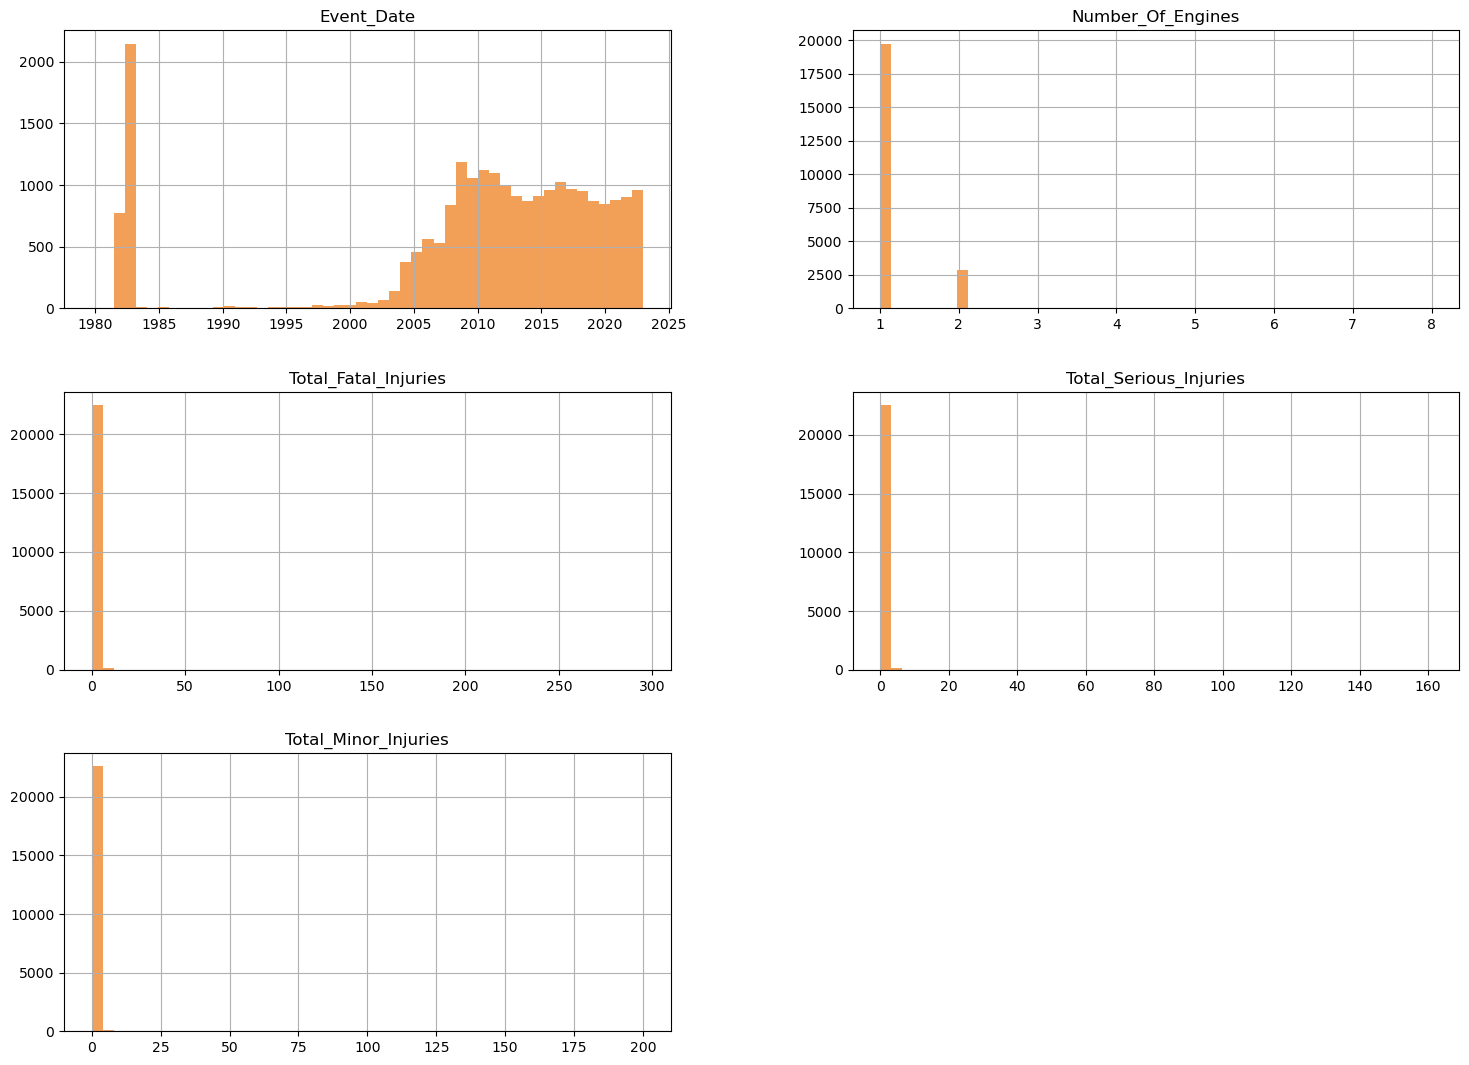

In [119]:
df2.hist(bins=50, color="#F29F58", figsize=(18,13));

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

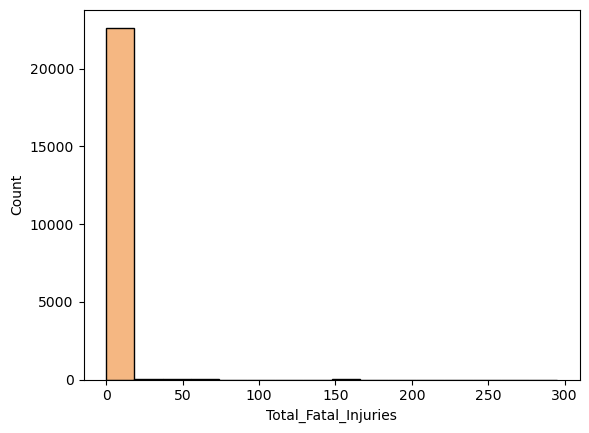

In [ ]:
#bar plot to show distribution of fatal injuries
sns.histplot(df2["Total_Fatal_Injuries"], color="#F29F58")
plt.show

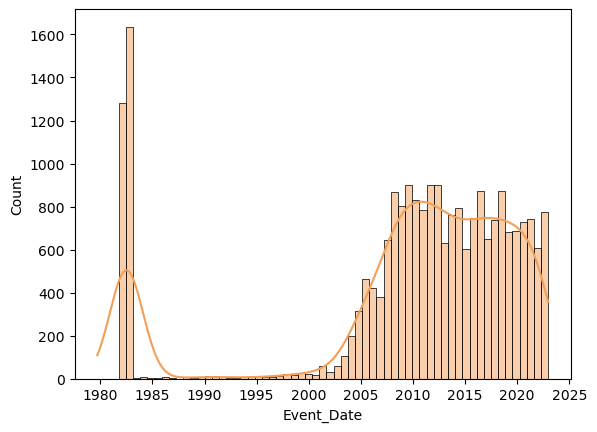

In [ ]:
#plot a histogram and kde plot to show distribution of event date
sns.histplot(df2["Event_Date"], kde=True, color="#F29F58")
plt.show()

## Bivariate Analysis

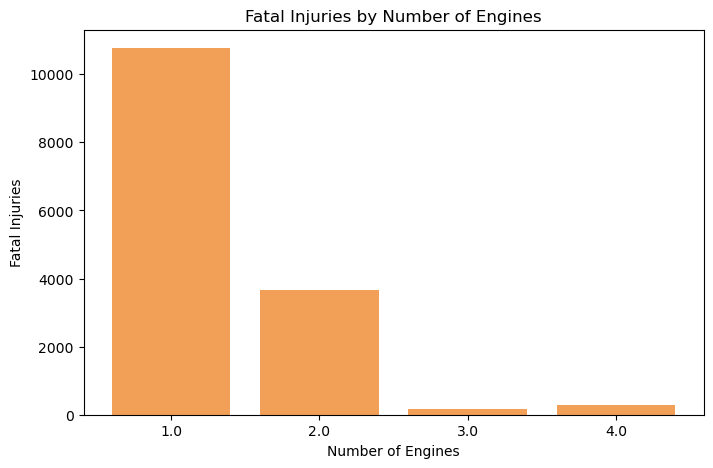

In [ ]:
# get the rows where accidents had fatal injuries
fatal_injuries = df2[df2["Total_Fatal_Injuries"] > 0]

# plot the fatal accidents by the number of engines in an aircraft
fig, ax = plt.subplots(figsize=(8,5))

# group the number of engines with the total number of fatal injuries
fatal_injuries_by_number = fatal_injuries.groupby("Number_Of_Engines")["Total_Fatal_Injuries"].sum().reset_index()


ax.bar(fatal_injuries_by_number["Number_Of_Engines"], fatal_injuries_by_number["Total_Fatal_Injuries"], color="#F29F58")
ax.set_xticks(fatal_injuries_by_number["Number_Of_Engines"])
ax.set_xticklabels(fatal_injuries_by_number["Number_Of_Engines"])
ax.set_xlabel("Number of Engines")
ax.set_ylabel("Fatal Injuries")
ax.set_title("Fatal Injuries by Number of Engines")

plt.show()

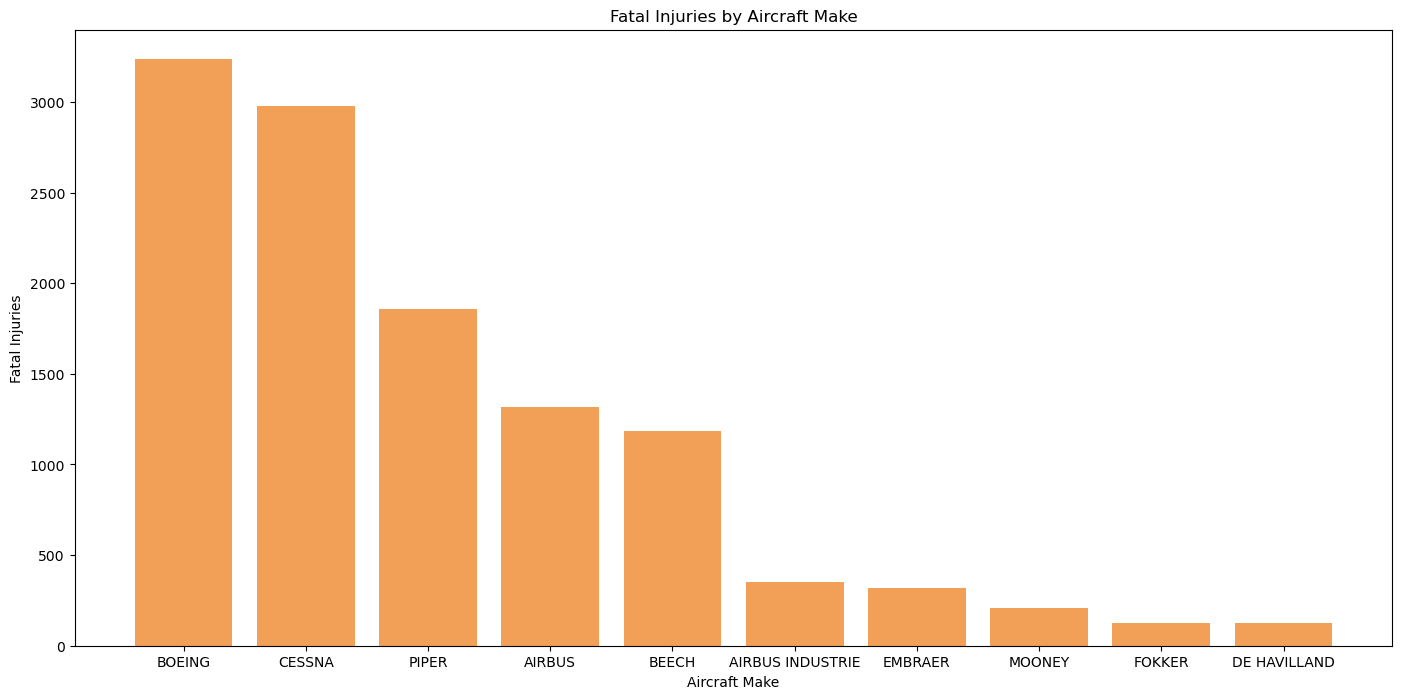

In [ ]:
# plot a bar graph of fatal injuries by make of aircraft

fatal_injuries["Total_Fatal_Injuries"].value_counts().tail(10)
# use groupby to select the injuries with the Make
fatal_injuries_by_make = fatal_injuries.groupby("Make")["Total_Fatal_Injuries"].sum().reset_index()

# sort in descending order
fatal_injuries_by_make.sort_values("Total_Fatal_Injuries", ascending=False, inplace=True)

# select the top 10

top_10_makes = fatal_injuries_by_make.head(10)

fig, ax = plt.subplots(figsize=(17,8))
ax.bar(top_10_makes["Make"], top_10_makes["Total_Fatal_Injuries"], color="#F29F58")
ax.set_title("Fatal Injuries by Aircraft Make")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Fatal Injuries")

plt.show()

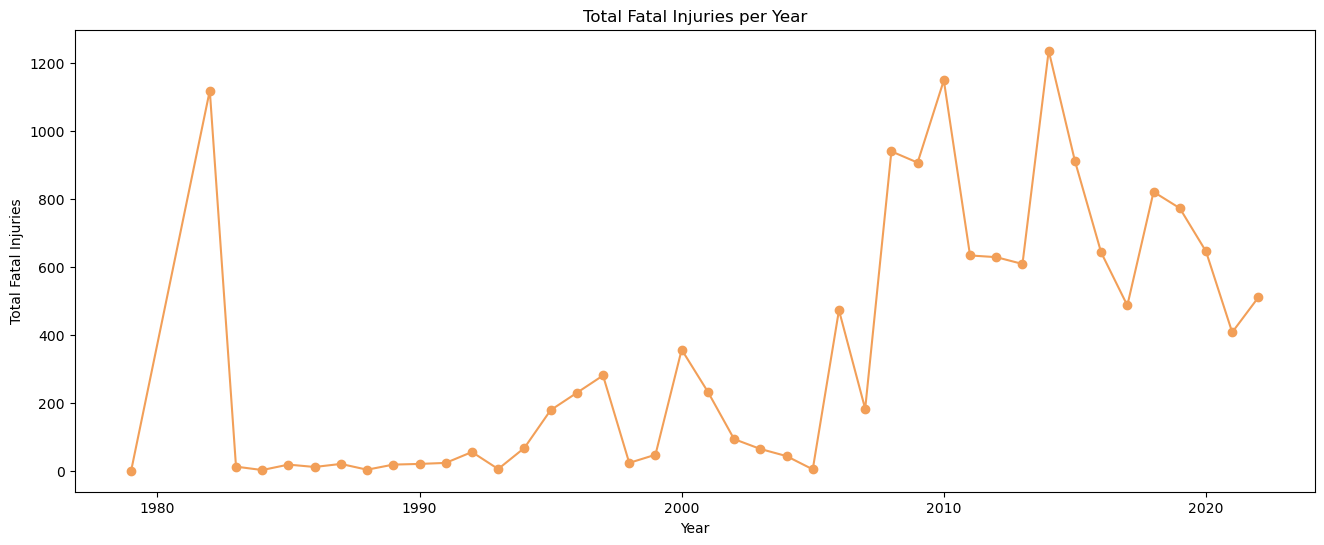

In [ ]:
# plot a graph of the fatal injuries per year

# group the year and the total fatal injuries
injuries_per_year = df2.groupby(df2["Event_Date"].dt.year)["Total_Fatal_Injuries"].sum().reset_index()

plt.figure(figsize=(16,6))
plt.plot(injuries_per_year["Event_Date"], injuries_per_year["Total_Fatal_Injuries"], color="#F29F58", marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Total Fatal Injuries")
plt.title("Total Fatal Injuries per Year")

plt.show()

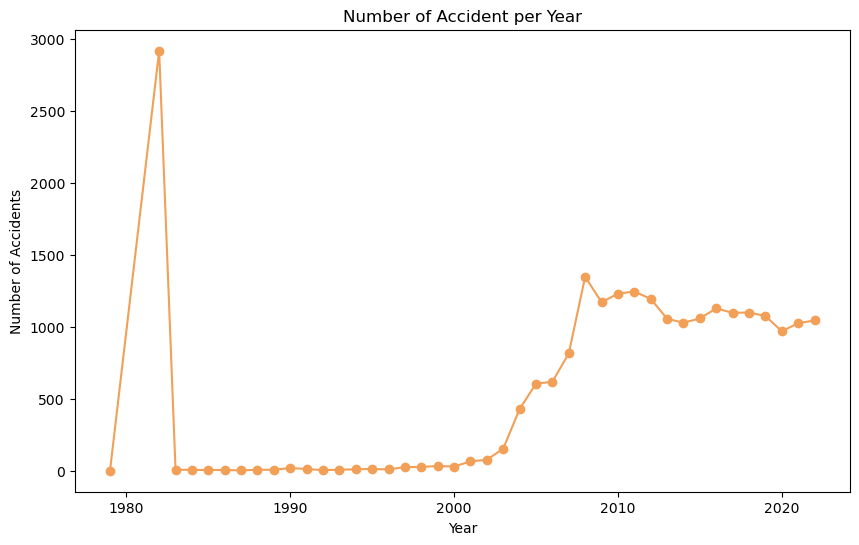

In [ ]:
# plot a line of graph of total fatal injuries and the dates

# find the number of accidents per year

accidents_per_year = df2.groupby(df2["Event_Date"].dt.year).size().reset_index(name="Counts")

plt.figure(figsize=(10,6))
plt.plot(accidents_per_year["Event_Date"], accidents_per_year["Counts"], marker="o", linestyle="-", color="#F29F58")
plt.title("Number of Accident per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()